In [1]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib

In [2]:
# output_base_folder = Path("/iarai/work/logs/storage_benchmarking")
output_base_folder = Path("/home/ivan/temp/temp-benchmarking")


## Dataloader benchmark (num workers, batch size)

**parameters**

| param | range |
| --- | --- |
| num_workers |0, 2, 4, 8, 16 | 
| batch_size | 8, 16, 32, 64 | 
| num_fetch_workers | 4, 8, 16, 32 | 
| fetch_impl | asyncio, threaded |
| dataset | s3,scratch |

Batch pool size is fixed to 10

**parameters explained**

| param | implementation | details | 
| --- | --- | --- |
| batch_pool_size | asyncio | Unused |
|  | threaded | Number of batches to fetch in parallel (normally, one batch is fetched, and items are downloaded (sequentially or in parallel). This implementation takes N batches and starts downloading items in parallel. Individual items are yielded and once a full batch is collected it is yielded.)|
| num_fetch_workers | asyncio | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls. Also, the number of tasks initially placed into the task (worker) queue.  |
|  | threaded | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls |

In [3]:
group_by_dataloader = ["dataset", "batch_size", "fetch_impl", "prefetch_factor"]

In [4]:
s3_folder_filter="e2e1210/*benchmark_e2e_s3*"

In [5]:
# df_dataloader_s3_full = extract_pandas(output_base_folder, folder_filter="e2e-vanilla/*benchmark_e2e_s3*")
df_dataloader = extract_pandas(output_base_folder, folder_filter=s3_folder_filter)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1456/1456 [01:26<00:00, 16.88it/s]


In [6]:
# df_dataloader[df_dataloader["fetch_impl"]=="asyncio"].index
# df_dataloader = df_dataloader[(df_dataloader.fetch_impl == "vanilla") & 
#                               (df_dataloader.fetch_impl == "threaded")]
# df_dataloader[df_dataloader.fetch_impl == "threaded"]
# df_dataloader[df_dataloader.fetch_impl=="vanilla"]

In [6]:
df_dataloader_async=df_dataloader[df_dataloader["fetch_impl"]=="asyncio"]
df_dataloader = df_dataloader[(df_dataloader.fetch_impl == "vanilla") | 
                              (df_dataloader.fetch_impl == "threaded")]

df_dataloader_threaded=df_dataloader[df_dataloader["fetch_impl"]=="threaded"]
df_dataloader = df_dataloader[(df_dataloader.fetch_impl == "vanilla")]

df_dataloader_vanilla=df_dataloader[df_dataloader["fetch_impl"]=="vanilla"]
del df_dataloader

In [7]:
df_dataloader_async

,trace_name,trace_level,function_name,elapsed,time_start,time_end,process_time,process_time_start,process_time_end,pid,...,momentum,weight_decay,pretrained,system,node,release,version,machine,source_file,run
0,(5)-get_item,5,__getitem__,84.968517,1.634057e+09,1.634057e+09,2.205517,0.611895,2.817412,31141,...,0.9,0.0001,False,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/home/ivan/temp/temp-benchmarking/e2e1210/2021...,20211012f183310_benchmark_e2e_s3_512_16_32_sync
1,(5)-get_item,5,__getitem__,0.176355,1.634057e+09,1.634057e+09,0.032036,2.835594,2.867631,31141,...,0.9,0.0001,False,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/home/ivan/temp/temp-benchmarking/e2e1210/2021...,20211012f183310_benchmark_e2e_s3_512_16_32_sync
2,(5)-get_item,5,__getitem__,0.130764,1.634057e+09,1.634057e+09,0.022257,2.884445,2.906702,31141,...,0.9,0.0001,False,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/home/ivan/temp/temp-benchmarking/e2e1210/2021...,20211012f183310_benchmark_e2e_s3_512_16_32_sync
3,(5)-get_item,5,__getitem__,0.132842,1.634057e+09,1.634057e+09,0.040348,2.920887,2.961235,31141,...,0.9,0.0001,False,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/home/ivan/temp/temp-benchmarking/e2e1210/2021...,20211012f183310_benchmark_e2e_s3_512_16_32_sync
4,(5)-get_item,5,__getitem__,86.988160,1.634057e+09,1.634057e+09,2.603598,0.424713,3.028311,31141,...,0.9,0.0001,False,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/home/ivan/temp/temp-benchmarking/e2e1210/2021...,20211012f183310_benchmark_e2e_s3_512_16_32_sync
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,(5)-get_item,5,__getitem__,0.416715,1.634054e+09,1.634054e+09,0.723778,34.855267,35.579044,23470,...,0.9,0.0001,False,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/home/ivan/temp/temp-benchmarking/e2e1210/2021...,20211012f174126_benchmark_e2e_s3_128_16_32_sync
1545,(5)-get_item,5,__getitem__,0.146512,1.634054e+09,1.634054e+09,0.223086,35.367429,35.590515,23470,...,0.9,0.0001,False,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/home/ivan/temp/temp-benchmarking/e2e1210/2021...,20211012f174126_benchmark_e2e_s3_128_16_32_sync
1546,(5)-get_item,5,__getitem__,0.163519,1.634054e+09,1.634054e+09,0.242830,35.358712,35.601542,23470,...,0.9,0.0001,False,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/home/ivan/temp/temp-benchmarking/e2e1210/2021...,20211012f174126_benchmark_e2e_s3_128_16_32_sync
1547,(4)-asyncmapdataset-fetcher,4,fetch,1.381122,1.634054e+09,1.634054e+09,2.415785,33.225807,35.641591,23470,...,0.9,0.0001,False,Linux,lnx-slim-2,4.19.0-14-amd64,#1 SMP Debian 4.19.171-2 (2021-01-30),x86_64,/home/ivan/temp/temp-benchmarking/e2e1210/2021...,20211012f174126_benchmark_e2e_s3_128_16_32_sync


In [71]:
df_dataloader_vanilla["run"]

0       20211012f135612_benchmark_e2e_s3_128_16_32_sync
1       20211012f135612_benchmark_e2e_s3_128_16_32_sync
2       20211012f135612_benchmark_e2e_s3_128_16_32_sync
3       20211012f135612_benchmark_e2e_s3_128_16_32_sync
4       20211012f135612_benchmark_e2e_s3_128_16_32_sync
                             ...                       
1535    20211012f151222_benchmark_e2e_s3_512_16_32_sync
1536    20211012f151222_benchmark_e2e_s3_512_16_32_sync
1537    20211012f151222_benchmark_e2e_s3_512_16_32_sync
1538    20211012f151222_benchmark_e2e_s3_512_16_32_sync
1539    20211012f151222_benchmark_e2e_s3_512_16_32_sync
Name: run, Length: 1547466, dtype: object

In [10]:
df_s3_gpu_util = extract_gpu_utilization(output_base_folder, folder_filter=s3_folder_filter,device_id=2)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:01<00:00, 14.43it/s]


In [11]:
df_s3_gpu_util

,run,gpu,gpu_mean,gpu_median,std
0,20211012f135612_benchmark_e2e_s3_128_16_32_sync,"[4.0, 10.0, 0.0, 0.0, 34.0, 64.0, 73.0, 0.0, 1...",54.1350,61.5,28.772587
1,20211012f154048_benchmark_e2e_s3_512_16_32_sync,"[18.0, 100.0, 30.0, 91.0, 15.0, 100.0, 13.0, 6...",50.7600,54.5,34.643071
2,20211012f164815_benchmark_e2e_s3_256_16_32_sync,"[41.0, 55.0, 39.0, 69.0, 24.0, 33.0, 12.0, 100...",50.8250,53.5,34.132600
3,20211012f183310_benchmark_e2e_s3_512_16_32_sync,"[15.0, 36.0, 29.0, 27.0, 13.0, 52.0, 9.0, 93.0...",46.3700,33.5,35.186547
4,20211012f163540_benchmark_e2e_s3_256_16_32_sync,"[2.0, 13.0, 36.0, 42.0, 7.0, 86.0, 64.0, 67.0,...",52.8000,55.0,33.843611
5,20211012f182037_benchmark_e2e_s3_512_16_32_sync,"[4.0, 64.0, 15.0, 100.0, 4.0, 64.0, 10.0, 91.0...",45.3600,34.5,34.164461
6,20211012f162211_benchmark_e2e_s3_128_16_32_sync,"[3.0, 88.0, 4.0, 74.0, 34.0, 50.0, 7.0, 80.0, ...",56.8175,61.5,26.030351
7,20211012f132417_benchmark_e2e_s3_128_16_32_sync,"[76.0, 66.0, 74.0, 44.0, 57.0, 49.0, 91.0, 71....",57.1850,62.0,26.601988
8,20211012f180743_benchmark_e2e_s3_256_16_32_sync,"[8.0, 67.0, 50.0, 57.0, 0.0, 80.0, 7.0, 3.0, 8...",51.9000,56.0,34.623258
9,20211012f170122_benchmark_e2e_s3_512_16_32_sync,"[3.0, 61.0, 12.0, 0.0, 10.0, 75.0, 15.0, 8.0, ...",43.5300,35.0,35.409167


In [12]:
group_by_dataloader = ["dataset", "batch_size", "fetch_impl", "prefetch_factor"]

In [14]:

# tmp
for i in range(10):
    tmp = df_dataloader_async[df_dataloader_async["run"]=="20211012f183310_benchmark_e2e_s3_512_16_32_sync"]
    pd.set_option('display.float_format', lambda x: '%.8f' % x)
    iloc = i
    t = tmp[(tmp["trace_level"]==4)]
    st=t["time_start"].iloc[iloc] #1634056846.19644
    et=t["time_end"].iloc[iloc]#1634056957.99265
    pid=t["pid"].iloc[iloc] #31141

    print("Elapsed: ", t["elapsed"].iloc[iloc])

    del t
    len(tmp)
    elapsed_fetch = tmp[(tmp["trace_level"]==5) & 
                        (tmp["time_start"]>st) & 
                        (tmp["time_end"]<et) &
                        (tmp["pid"]==pid)]["elapsed"]
    del tmp
    elapsed_fetch=np.array(elapsed_fetch)
    len(elapsed_fetch)
    print("Sum: ", elapsed_fetch.sum()/32) # is it duplicated?!


Elapsed:  111.79620623588562
Sum:  212.9207562629599
Elapsed:  8.166375920176506
Sum:  9.030058499891311
Elapsed:  6.944346487522125
Sum:  8.110553801292554
Elapsed:  111.75160793960094
Sum:  213.57050913549028
Elapsed:  7.649163406342268
Sum:  8.678384204627946
Elapsed:  7.174958243966103
Sum:  8.862631790339947
Elapsed:  105.94267120957375
Sum:  200.60389450308867
Elapsed:  7.548595130443573
Sum:  9.044641998130828
Elapsed:  6.708854854106903
Sum:  8.655934465117753
Elapsed:  108.68699282035232
Sum:  160.15219743456692


In [74]:
tmp = df_dataloader_async[df_dataloader_async["run"]=="20211012f183310_benchmark_e2e_s3_512_16_32_sync"].drop_duplicates()
tmp2 = df_dataloader_vanilla[df_dataloader_vanilla["run"]=="20211012f151222_benchmark_e2e_s3_512_16_32_sync"].drop_duplicates()

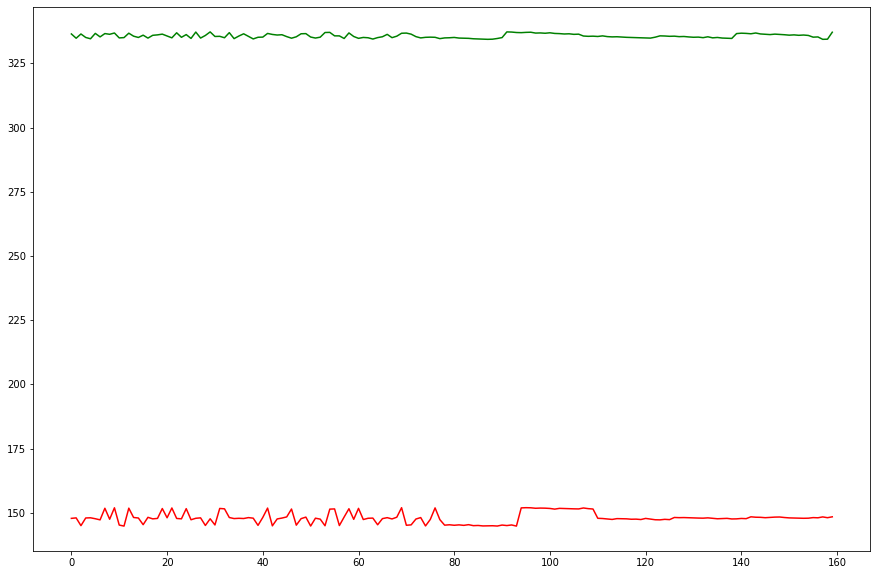

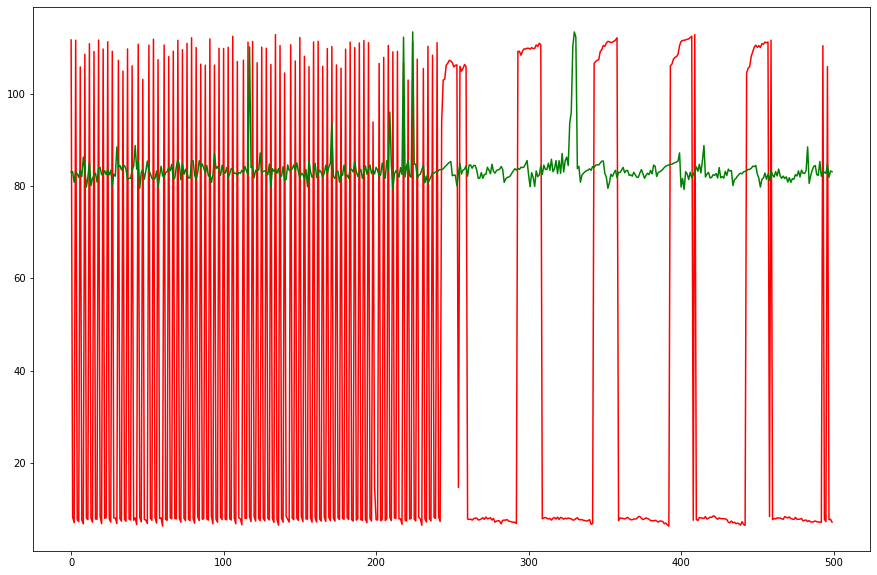

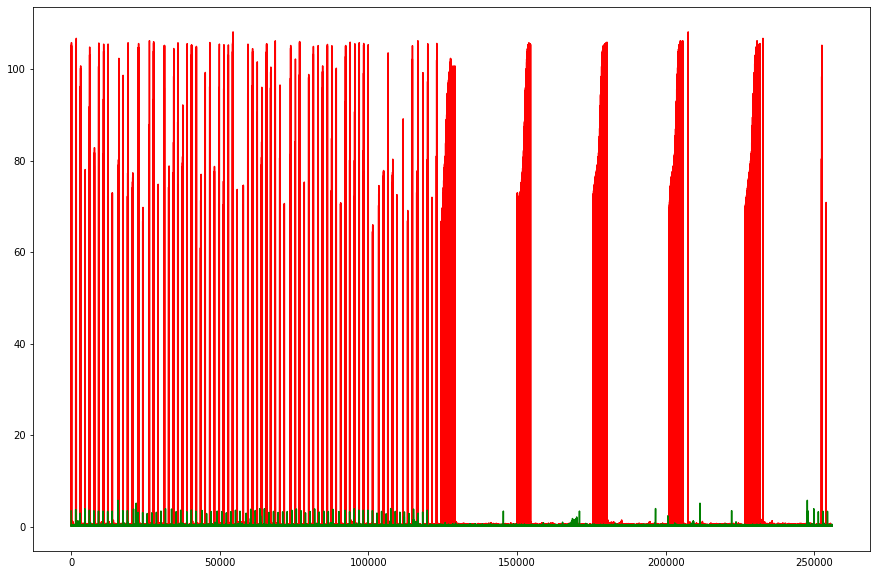

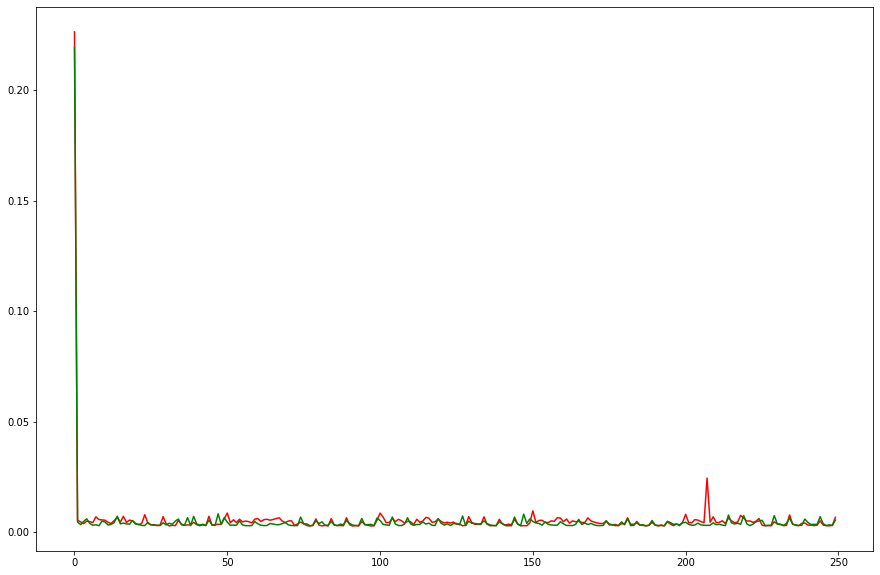

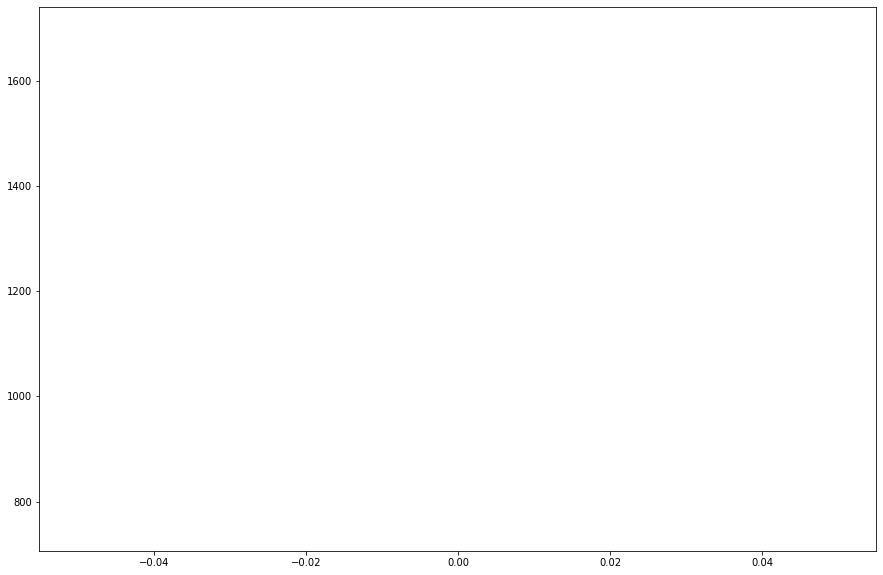

In [84]:
# 3 = _worker_loop
# 4 = fetch
# 5 = __getitem__
# 6 = training_step

for tl in [3, 4, 5, 6, 8]:
    f1 = tmp[tmp["trace_level"]==tl]
    f2 = tmp2[tmp2["trace_level"]==tl]
#     print(len(f))
    all_elapsed1 = np.array(f1["elapsed"])
    all_elapsed2 = np.array(f2["elapsed"])
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(all_elapsed1, color="red")    
    ax.plot(all_elapsed2, color="green")

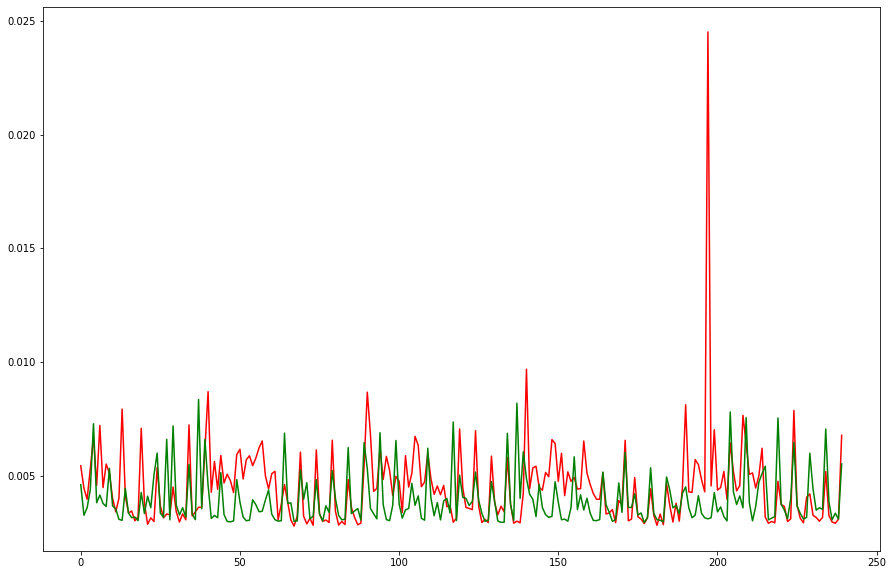

In [95]:
f1 = tmp[tmp["trace_level"]==6]
f2 = tmp2[tmp2["trace_level"]==6]
#     print(len(f))
all_elapsed1 = np.array(f1["elapsed"])[10:]
all_elapsed2 = np.array(f2["elapsed"])[10:]
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(all_elapsed1, color="red")    
ax.plot(all_elapsed2, color="green")

In [96]:
print(np.unique(tmp["trace_level"].to_numpy()))

[3 4 5 6 8]


In [167]:
# 3 = _worker_loop
# 4 = fetch
# 5 = __getitem__
# 6 = training_step

def cnt(ds):
    f2 = ds[ds["trace_level"]==3]
    f2 = f2[10:]
    st=f2["time_start"].iloc[0] #1634056846.19644
    et=f2["time_end"].iloc[-1]#1634056957.99265
    f2 = ds[(ds["trace_level"]==5) & (ds["time_start"] >= st) & (ds["time_end"] <= et)]
    tp = len(f2) / (et-st)
    return len(f2), tp

In [168]:
f1, tp1 = cnt(tmp)
f2, tp2 = cnt(tmp2)

In [169]:
print(f"Throughput acync: {f1}, {tp1}")
print(f"Throughput vanilla: {f2}, {tp2}")

Throughput acync: 256000, 342.11284579963194
Throughput vanilla: 102400, 151.95186936747123
